In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Comcast_telecom_complaints_data.csv')

In [3]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'], format= '%d-%m-%y')

In [6]:
df = df.drop('Date_month_year', axis= 1)

<AxesSubplot:>

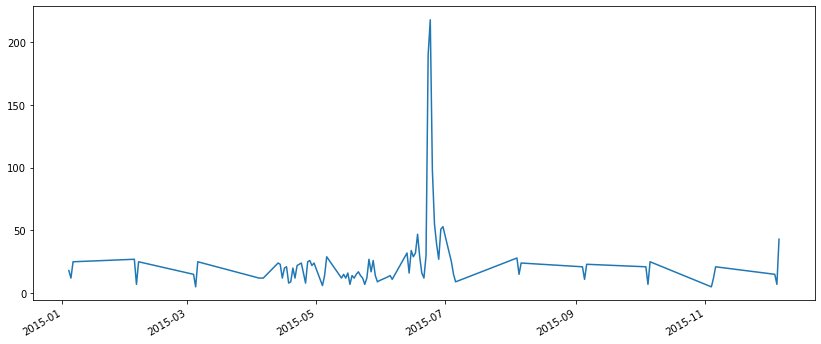

In [7]:
plt.figure(figsize=(14,6))
df['Date'].value_counts().plot()

In [8]:
import datetime

In [9]:
df = df.set_index(df['Date'])

<AxesSubplot:xlabel='Date', ylabel='Number of Complaints'>

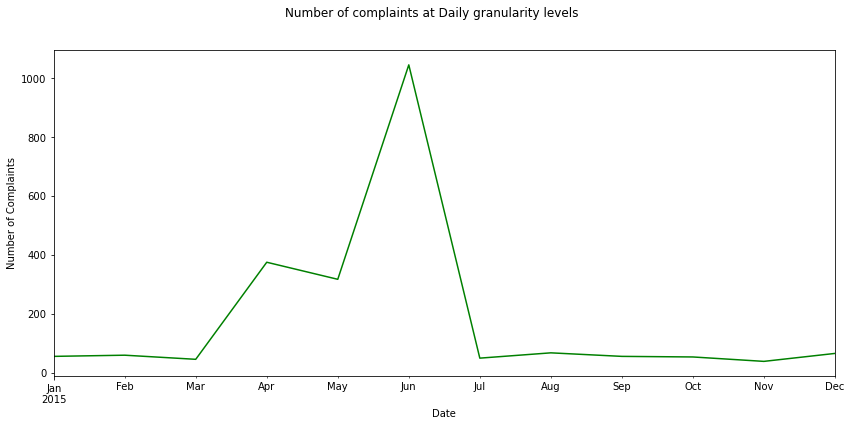

In [10]:
plt.figure(figsize=(14,6))
plt.suptitle('Number of complaints at Daily granularity levels')
plt.ylabel('Number of Complaints')
df.groupby(pd.Grouper(freq="m")).size().plot(color='g')

<AxesSubplot:xlabel='Date', ylabel='Number of Complaints'>

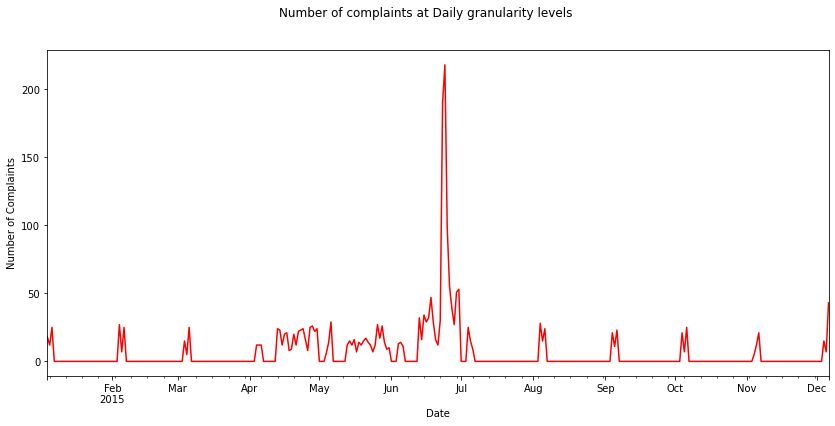

In [11]:
plt.figure(figsize=(14,6))
plt.suptitle('Number of complaints at Daily granularity levels')
plt.ylabel('Number of Complaints')
df.groupby(pd.Grouper(freq="D")).size().plot(color='red')

In [12]:
complaint_type = df['Customer Complaint'].str.upper().value_counts()

## top 25 complaint type

In [13]:
complaint_type.head(25)

COMCAST                             102
COMCAST DATA CAP                     30
COMCAST INTERNET                     29
COMCAST DATA CAPS                    21
COMCAST BILLING                      18
COMCAST SERVICE                      15
INTERNET SPEED                       15
UNFAIR BILLING PRACTICES             13
DATA CAPS                            13
DATA CAP                             12
COMCAST COMPLAINT                    11
COMCAST/XFINITY                      11
COMCAST INTERNET SERVICE             10
BILLING                               9
BILLING ISSUES                        8
COMCAST CABLE                         5
INTERNET                              5
COMCAST BILLING COMPLAINT             5
COMCAST ISSUES                        5
COMCAST BILLING PRACTICES             5
SERVICE ISSUES                        5
SLOW INTERNET                         5
INTERNET SERVICE                      5
COMPLAINT AGAINST COMCAST             5
COMCAST UNFAIR BILLING PRACTICES      4


In [22]:
df['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [51]:
df['Status'] =["Open" if i=='Open' or i== 'Pending' else 'Closed' for i in df['New_Status']]

In [53]:
df = df.drop('New_Status' ,axis=1)

## Provide state wise status of complaints in a stacked bar chart

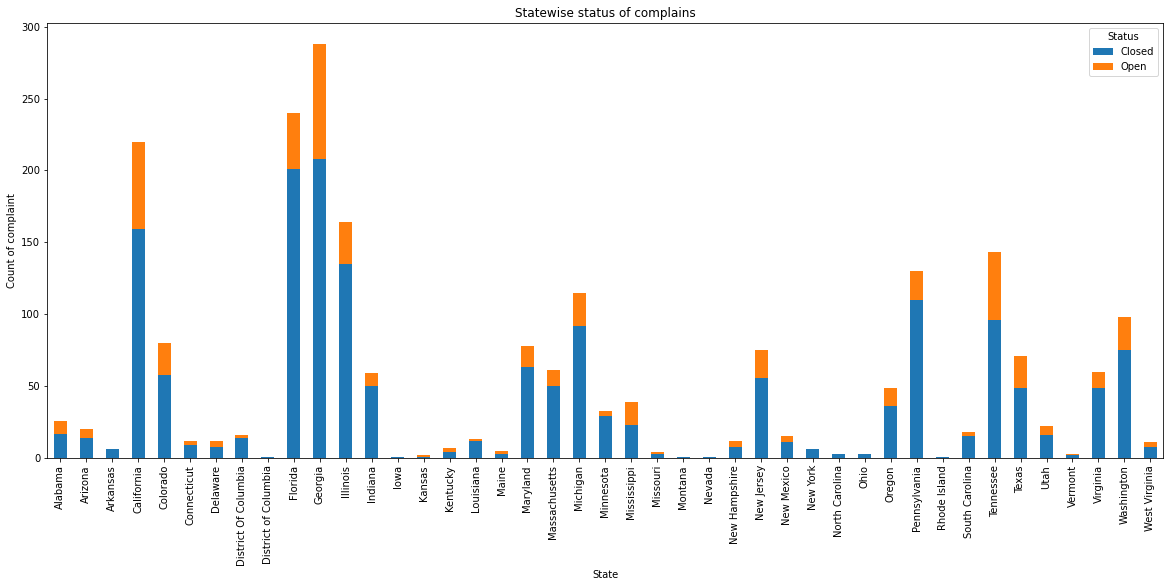

In [93]:
pd.crosstab(df['State'] , df['Status']).plot(kind = 'bar' , figsize  =(20,8) , stacked = True , title = 'Statewise status of complains', ylabel = 'Count of complaint')
plt.show()

## state with max complaints

In [112]:
df['State'].value_counts().nlargest(1)

Georgia    288
Name: State, dtype: int64

## Which state has the highest percentage of unresolved complaints

In [114]:
df_unresolved = df[df['Status'] == 'Open']

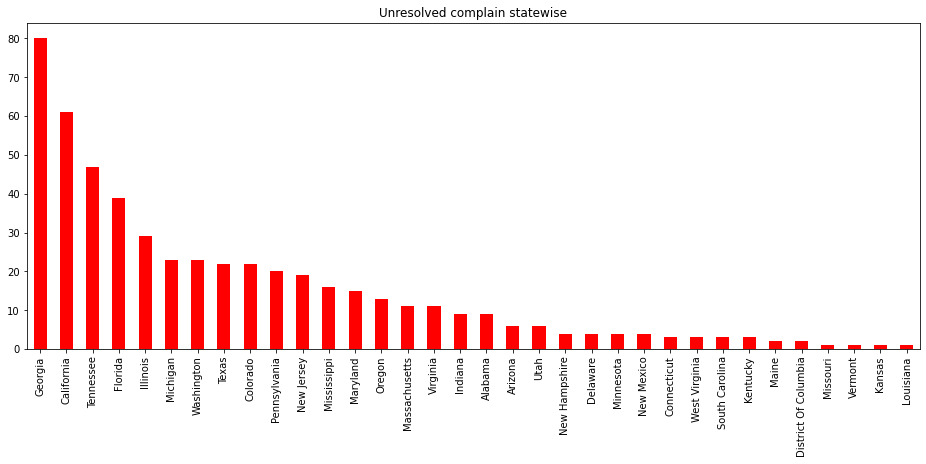

In [125]:
df_unresolved['State'].value_counts().plot(kind = 'bar' , color = 'r' ,figsize = (16,6) ,title = 'Unresolved complain statewise')
plt.show()

In [140]:
count_of_unresolved = df_unresolved['State'].value_counts()

In [141]:
percentagewise_open_complaints = count_of_unresolved/sum(count_of_unresolved)*100

In [146]:
percentagewise_open_complaints

Georgia                 15.473888
California              11.798839
Tennessee                9.090909
Florida                  7.543520
Illinois                 5.609284
Michigan                 4.448743
Washington               4.448743
Texas                    4.255319
Colorado                 4.255319
Pennsylvania             3.868472
New Jersey               3.675048
Mississippi              3.094778
Maryland                 2.901354
Oregon                   2.514507
Massachusetts            2.127660
Virginia                 2.127660
Indiana                  1.740812
Alabama                  1.740812
Arizona                  1.160542
Utah                     1.160542
New Hampshire            0.773694
Delaware                 0.773694
Minnesota                0.773694
New Mexico               0.773694
Connecticut              0.580271
West Virginia            0.580271
South Carolina           0.580271
Kentucky                 0.580271
Maine                    0.386847
District Of Co

## 76.8% percentage of complaints resolved till date

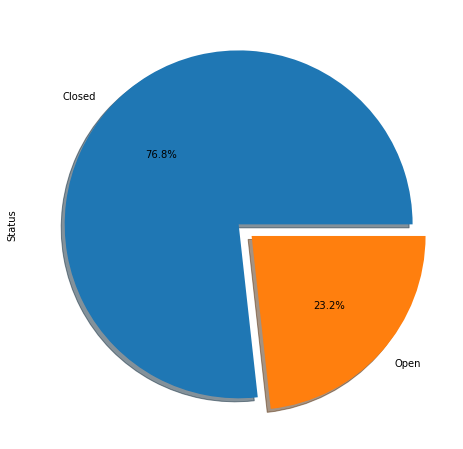

In [170]:
df['Status'].value_counts().plot(kind = 'pie',explode = (0,0.1), shadow = True , figsize = (8,8), autopct='%1.1f%%')
plt.show()